In [1]:
import pandas as pd
import numpy as np 

In [2]:
data = pd.read_csv(r'./microdados_enem_2023/DADOS/MICRODADOS_ENEM_2023.csv', encoding="latin1", sep = ';')

In [3]:
data.shape

(3933955, 76)

#### Tratamento

In [4]:
df = data.copy()

In [5]:
colex = [
    'NU_INSCRICAO',
    'NU_ANO',
    'TP_PRESENCA_CN',
    'TP_PRESENCA_CH',
    'TP_PRESENCA_LC',
    'TP_PRESENCA_MT',
    'CO_PROVA_CN',
    'CO_PROVA_CH',
    'CO_PROVA_LC',
    'CO_PROVA_MT',
    'TX_RESPOSTAS_CN',
    'TX_RESPOSTAS_CH',
    'TX_RESPOSTAS_LC',
    'TX_RESPOSTAS_MT',
    'TP_LINGUA',
    'TX_GABARITO_CN',
    'TX_GABARITO_CH',
    'TX_GABARITO_LC',
    'TX_GABARITO_MT',
    'TP_STATUS_REDACAO',
    'NU_NOTA_COMP1',
    'NU_NOTA_COMP2',
    'NU_NOTA_COMP3',
    'NU_NOTA_COMP4',
    'NU_NOTA_COMP5'
]

In [6]:
df.drop(columns = colex, inplace=True)

In [7]:
df['NU_FINAL'] = df[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].mean(axis=1)

In [8]:
df.head()

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_FINAL
0,14,M,2,1,1,1,17,1,NaN,0,...,C,B,B,A,B,B,A,A,B,NaN
1,12,M,2,1,0,1,16,1,NaN,0,...,A,B,B,A,A,C,A,D,B,NaN
2,6,F,1,1,1,1,0,1,NaN,0,...,A,A,B,A,A,A,A,A,B,507.94
3,2,F,1,3,1,2,0,2,1.0,0,...,A,A,B,A,A,D,A,A,B,564.28
4,3,F,1,3,1,2,0,2,1.0,0,...,A,A,B,A,A,B,A,A,A,425.38


In [9]:
#Checando os valores nulos com is_null().sum()
df.isnull().sum()

TP_FAIXA_ETARIA                 0
TP_SEXO                         0
TP_ESTADO_CIVIL                 0
TP_COR_RACA                     0
TP_NACIONALIDADE                0
TP_ST_CONCLUSAO                 0
TP_ANO_CONCLUIU                 0
TP_ESCOLA                       0
TP_ENSINO                 2594874
IN_TREINEIRO                    0
CO_MUNICIPIO_ESC          2975449
NO_MUNICIPIO_ESC          2975449
CO_UF_ESC                 2975449
SG_UF_ESC                 2975449
TP_DEPENDENCIA_ADM_ESC    2975449
TP_LOCALIZACAO_ESC        2975449
TP_SIT_FUNC_ESC           2975449
CO_MUNICIPIO_PROVA              0
NO_MUNICIPIO_PROVA              0
CO_UF_PROVA                     0
SG_UF_PROVA                     0
NU_NOTA_CN                1241528
NU_NOTA_CH                1111312
NU_NOTA_LC                1111312
NU_NOTA_MT                1241528
NU_NOTA_REDACAO           1111312
Q001                            0
Q002                            0
Q003                            0
Q004          

In [10]:
df = df.dropna(subset=['NU_FINAL', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO'])

In [11]:
#Checando os valores nulos com is_null().sum()
df.isnull().sum()

TP_FAIXA_ETARIA                 0
TP_SEXO                         0
TP_ESTADO_CIVIL                 0
TP_COR_RACA                     0
TP_NACIONALIDADE                0
TP_ST_CONCLUSAO                 0
TP_ANO_CONCLUIU                 0
TP_ESCOLA                       0
TP_ENSINO                 1649991
IN_TREINEIRO                    0
CO_MUNICIPIO_ESC          1956835
NO_MUNICIPIO_ESC          1956835
CO_UF_ESC                 1956835
SG_UF_ESC                 1956835
TP_DEPENDENCIA_ADM_ESC    1956835
TP_LOCALIZACAO_ESC        1956835
TP_SIT_FUNC_ESC           1956835
CO_MUNICIPIO_PROVA              0
NO_MUNICIPIO_PROVA              0
CO_UF_PROVA                     0
SG_UF_PROVA                     0
NU_NOTA_CN                      0
NU_NOTA_CH                      0
NU_NOTA_LC                      0
NU_NOTA_MT                      0
NU_NOTA_REDACAO                 0
Q001                            0
Q002                            0
Q003                            0
Q004          

In [12]:
df.shape

(2678264, 52)

In [13]:
cols = [
    'TP_ENSINO',
    'IN_TREINEIRO',
    'CO_MUNICIPIO_ESC',
    'NO_MUNICIPIO_ESC',
    'CO_UF_ESC',
    'SG_UF_ESC',
    'TP_DEPENDENCIA_ADM_ESC',
    'TP_LOCALIZACAO_ESC',
    'TP_SIT_FUNC_ESC'
]

df[cols] = df[cols].fillna('Não Informado')

In [14]:
#Checando os valores nulos com is_null().sum()
df.isnull().sum()

TP_FAIXA_ETARIA           0
TP_SEXO                   0
TP_ESTADO_CIVIL           0
TP_COR_RACA               0
TP_NACIONALIDADE          0
TP_ST_CONCLUSAO           0
TP_ANO_CONCLUIU           0
TP_ESCOLA                 0
TP_ENSINO                 0
IN_TREINEIRO              0
CO_MUNICIPIO_ESC          0
NO_MUNICIPIO_ESC          0
CO_UF_ESC                 0
SG_UF_ESC                 0
TP_DEPENDENCIA_ADM_ESC    0
TP_LOCALIZACAO_ESC        0
TP_SIT_FUNC_ESC           0
CO_MUNICIPIO_PROVA        0
NO_MUNICIPIO_PROVA        0
CO_UF_PROVA               0
SG_UF_PROVA               0
NU_NOTA_CN                0
NU_NOTA_CH                0
NU_NOTA_LC                0
NU_NOTA_MT                0
NU_NOTA_REDACAO           0
Q001                      0
Q002                      0
Q003                      0
Q004                      0
Q005                      0
Q006                      0
Q007                      0
Q008                      0
Q009                      0
Q010                

In [15]:
df = df.drop(columns=['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO'])

#### Enconding

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
print(df.dtypes)

TP_FAIXA_ETARIA             int64
TP_SEXO                    object
TP_ESTADO_CIVIL             int64
TP_COR_RACA                 int64
TP_NACIONALIDADE            int64
TP_ST_CONCLUSAO             int64
TP_ANO_CONCLUIU             int64
TP_ESCOLA                   int64
TP_ENSINO                  object
IN_TREINEIRO                int64
CO_MUNICIPIO_ESC           object
NO_MUNICIPIO_ESC           object
CO_UF_ESC                  object
SG_UF_ESC                  object
TP_DEPENDENCIA_ADM_ESC     object
TP_LOCALIZACAO_ESC         object
TP_SIT_FUNC_ESC            object
CO_MUNICIPIO_PROVA          int64
NO_MUNICIPIO_PROVA         object
CO_UF_PROVA                 int64
SG_UF_PROVA                object
Q001                       object
Q002                       object
Q003                       object
Q004                       object
Q005                        int64
Q006                       object
Q007                       object
Q008                       object
Q009          

In [18]:
# Identificar colunas que são do tipo object (texto)
colunas_alfanumericas = df.select_dtypes(include=['object']).columns.tolist()

# Definir colunas candidatas para Label Encoding: tudo que NÃO é alfanumérico
colunas_label = df.columns.difference(colunas_alfanumericas)

colunas_label

Index(['CO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'IN_TREINEIRO', 'NU_FINAL', 'Q005',
       'TP_ANO_CONCLUIU', 'TP_COR_RACA', 'TP_ESCOLA', 'TP_ESTADO_CIVIL',
       'TP_FAIXA_ETARIA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO'],
      dtype='object')

In [19]:
le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col].astype(str))

In [20]:
df.head(10)

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_FINAL
2,6,0,1,1,1,1,0,1,2,0,...,0,0,1,0,0,0,0,0,1,507.94
3,2,0,1,3,1,2,0,2,0,0,...,0,0,1,0,0,3,0,0,1,564.28
4,3,0,1,3,1,2,0,2,0,0,...,0,0,1,0,0,1,0,0,0,425.38
9,11,1,1,1,1,1,8,1,2,0,...,0,1,2,1,0,2,0,1,1,617.12
10,8,1,1,3,1,1,5,1,2,0,...,0,1,1,0,0,4,0,1,1,697.66
11,3,1,1,3,4,2,0,2,0,0,...,0,0,1,0,0,1,0,1,1,671.12
13,3,0,1,1,1,1,1,1,2,0,...,0,0,1,0,0,2,0,1,1,638.90
14,11,0,1,2,1,1,7,1,2,0,...,0,0,1,0,0,2,0,0,1,545.76
15,7,0,1,3,1,1,4,1,2,0,...,0,0,1,0,0,3,0,1,1,437.66
16,4,0,1,1,1,2,0,2,0,0,...,0,0,1,0,0,3,1,0,1,586.04


In [21]:
df.columns

Index(['TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA',
       'TP_ENSINO', 'IN_TREINEIRO', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC',
       'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA', 'Q001', 'Q002',
       'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011',
       'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020',
       'Q021', 'Q022', 'Q023', 'Q024', 'Q025', 'NU_FINAL'],
      dtype='object')

#### Separação de treino e teste

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

In [33]:
df_sample = df.sample(frac=0.1, random_state=42)  # usa 10% dos dados (~300k linhas)

In [34]:
X = df_sample.drop(columns=['NU_FINAL'])
y = df_sample['NU_FINAL']

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

#### Regressão Linear

In [36]:
# Criar e treinar o modelo
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Prever no conjunto de teste
y_pred = model_lr.predict(X_test)

# Calcular o MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Linear Regression MSE: {mse:.4f}")

Linear Regression MSE: 6345.9402


In [37]:
r2 = r2_score(y_test, y_pred)
print(f"R²: {r2:.4f}")

R²: 0.2979


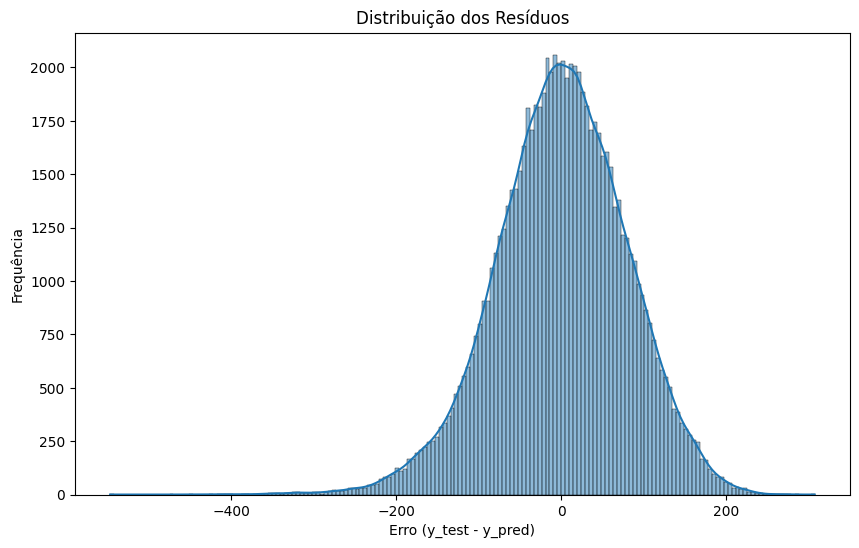

In [38]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribuição dos Resíduos')
plt.xlabel('Erro (y_test - y_pred)')
plt.ylabel('Frequência')
plt.show()

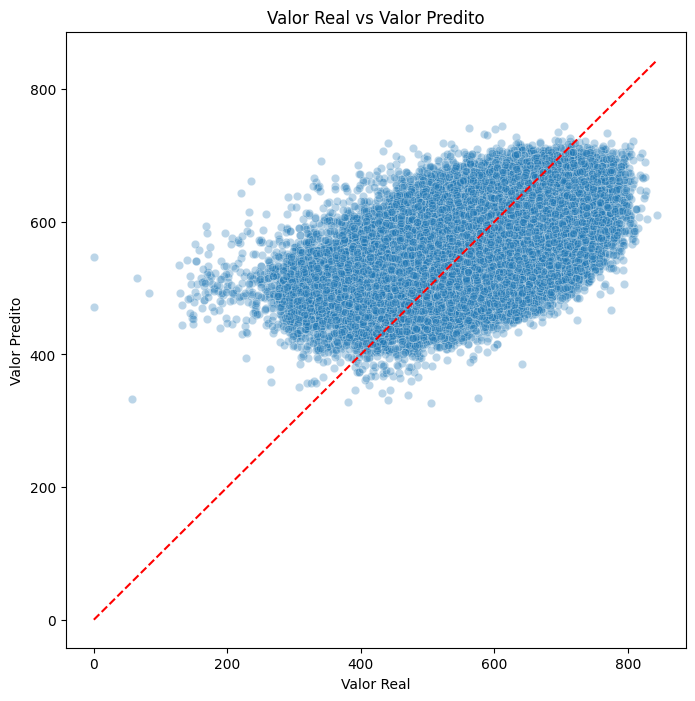

In [39]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.3)
plt.xlabel('Valor Real')
plt.ylabel('Valor Predito')
plt.title('Valor Real vs Valor Predito')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Linha de referência
plt.show()

#### RandomForest

In [40]:
# Instanciar o modelo
rf_model = RandomForestRegressor(
    n_estimators=20,    # número de árvores (padrão já é 100)
    max_depth=5,
    min_samples_split=10,# limite de profundidade (controla overfitting e tempo)
    random_state=42
)

# Treinar
rf_model.fit(X_train, y_train)

# Fazer previsões
y_pred_rf = rf_model.predict(X_test)

# Avaliação
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest MSE: {mse_rf:.4f}")
print(f"Random Forest R2: {r2_rf:.4f}")

Random Forest MSE: 6518.3208
Random Forest R2: 0.2788


#### XGBRegressor

In [41]:
# Inicializa o modelo com parâmetros básicos
xgb_model = XGBRegressor(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    random_state=42,
    verbosity=1
)

# Treina o modelo
xgb_model.fit(X_train, y_train)

# Faz a previsão
y_pred = xgb_model.predict(X_test)

# Calcula métricas
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"XGBRegressor MSE: {mse:.4f}")
print(f"XGBRegressor R2: {r2:.4f}")

XGBRegressor MSE: 5767.2011
XGBRegressor R2: 0.3619


In [42]:
from sklearn.model_selection import GridSearchCV

In [44]:
xgb = XGBRegressor(random_state=42, n_jobs=-1)

In [45]:
# Define os parâmetros para testar
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 1]
}

# Configura o GridSearch
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # otimiza pelo MSE
    cv=3,                             # 3 folds (pode ajustar)
    verbose=2,
    n_jobs=-1
)

# Rodar o GridSearch (pode demorar)
grid_search.fit(X_train, y_train)

# Resultados
print("Melhores parâmetros:", grid_search.best_params_)
print("Melhor MSE:", -grid_search.best_score_)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Melhores parâmetros: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.7}
Melhor MSE: 5748.593084628018


In [48]:
r2 = grid_search.best_estimator_.score(X_test, y_test)
print(f"R2 do melhor modelo XGB: {r2:.4f}")

R2 do melhor modelo XGB: 0.3699


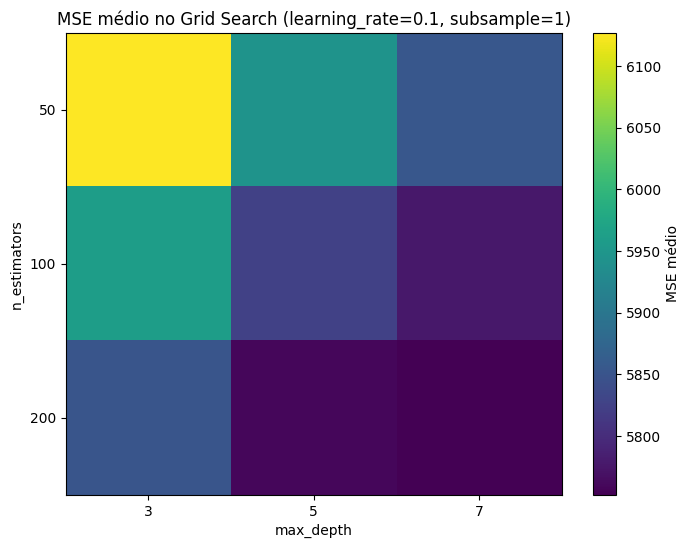

In [46]:
# Pega o resultado do GridSearch
results = pd.DataFrame(grid_search.cv_results_)

# Extrai as colunas de interesse
# Ajusta para ter média do score (neg MSE), e parametros testados
results['mean_test_MSE'] = -results['mean_test_score']

# Filtra só os valores para fixar learning_rate e subsample (exemplo: learning_rate=0.1 e subsample=1)
filtro = (results['param_learning_rate'] == 0.1) & (results['param_subsample'] == 1)

df_plot = results[filtro]

# Pivot table para o heatmap: linhas=n_estimators, colunas=max_depth, valores=mean_test_MSE
pivot_table = df_plot.pivot(index='param_n_estimators', columns='param_max_depth', values='mean_test_MSE')

plt.figure(figsize=(8,6))
plt.title('MSE médio no Grid Search (learning_rate=0.1, subsample=1)')
plt.xlabel('max_depth')
plt.ylabel('n_estimators')
plt.imshow(pivot_table, cmap='viridis', aspect='auto')
plt.colorbar(label='MSE médio')
plt.xticks(ticks=np.arange(len(pivot_table.columns)), labels=pivot_table.columns)
plt.yticks(ticks=np.arange(len(pivot_table.index)), labels=pivot_table.index)
plt.show()

### Conclusão

### ✅ Conclusão

Apesar do bom desempenho do `XGBoost`, especialmente após a separação dos dados por curso/modalidade, ainda existem limitações claras que afetam a performance geral dos modelos.

Para evoluir essa análise, os próximos passos recomendados são:

1. **Revisar e selecionar variáveis com base estatística**, utilizando testes de correlação, análise de variância e importância de features. Isso pode ajudar a reduzir dimensionalidade e ruído.
2. **Aplicar técnicas de clusterização (ex: KMeans)** para verificar se há agrupamentos naturais nos dados que possam ser modelados separadamente, aumentando a precisão.
3. **Aprimorar o GridSearch**, expandindo o espaço de busca e testando combinações mais amplas de hiperparâmetros.
4. **Buscar soluções alternativas**, como modelos mais simples com regularização (ex: Ridge, Lasso) ou arquiteturas baseadas em rede neural leve.
5. **Avaliar estratégias para evitar overfitting**, como validação cruzada mais robusta, feature selection e análise de variabilidade entre grupos.

Neste ponto, a discussão técnica ultrapassa a escolha do “melhor modelo” e passa a considerar **como contornar os limites do próprio dado** e do problema de base — garantindo interpretabilidade, estabilidade e aplicabilidade real dos resultados.